# STEP 1 Loading Data

In [1]:
import pandas as pd

# Load CSV file directly
file_path = r"C:\Users\mothi\OneDrive\Desktop\AI Fraud Detection System\PS_20174392719_1491204439457_log.csv"
df = pd.read_csv(file_path)

# Quick check
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(10)


Shape: (6362620, 11)
Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Step 2 # Basic info about dataset

In [2]:

print(df.info())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

Missing values per column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [3]:

# Summary statistics
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [4]:
# Fraud distribution
print("\nFraud distribution:\n", df['isFraud'].value_counts(normalize=True) * 100)


Fraud distribution:
 isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [5]:
df_model = df.drop(['nameOrig', 'nameDest'], axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model['type'] = le.fit_transform(df_model['type'])

In [7]:
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

# Step 3 Tranning & Testing 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Fraud cases in Train:", sum(y_train), " | Fraud cases in Test:", sum(y_test))

Train shape: (4453834, 8)  Test shape: (1908786, 8)
Fraud cases in Train: 5749  | Fraud cases in Test: 2464


# Step 4 Handle Imbalance with SMOTE

In [9]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_res.value_counts())


[notice] A new release of pip available: 22.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Before SMOTE: isFraud
0    4448085
1       5749
Name: count, dtype: int64

After SMOTE: isFraud
0    4448085
1    4448085
Name: count, dtype: int64


# Step 5 Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Logistic Regression
log_reg = LogisticRegression(
    max_iter=200,               # 1000 is unnecessary
    class_weight='balanced',    # handles imbalance
    random_state=42,
    n_jobs=-1                   # use all CPU cores
)

# Train on ORIGINAL training data (not SMOTE)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

c:\Users\mothi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
c:\Users\mothi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.88      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.91      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786


ROC-AUC Score: 0.9672409618299859


# Step 6 — Train a lightweight Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=75,
    max_depth=8,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf  = rf.predict(X_test)
y_prob_rf  = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC (RF):", roc_auc_score(y_test, y_prob_rf))

import joblib
joblib.dump(rf, "fraud_model.pkl")
print("Model saved successfully!")

Confusion Matrix (RF):
 [[1869207   37115]
 [     40    2424]]

Classification Report (RF):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906322
           1       0.06      0.98      0.12      2464

    accuracy                           0.98   1908786
   macro avg       0.53      0.98      0.55   1908786
weighted avg       1.00      0.98      0.99   1908786


ROC-AUC (RF): 0.9984325109825616
Model saved successfully!


In [12]:
import joblib
import os

# Save trained model
joblib.dump(rf, "fraud_model.pkl")

# Also save feature names (VERY IMPORTANT for Streamlit)
joblib.dump(X_train.columns.tolist(), "model_features.pkl")

print("Model saved successfully!")
print("Files in current folder:", os.listdir())

Model saved successfully!
Files in current folder: ['.ipynb_checkpoints', 'AI_Fraud_Detection_Final_Report.pdf', 'app.py', 'Fraud_detect_.ipynb', 'fraud_model.pkl', 'index.html', 'model_features.pkl', 'PS_20174392719_1491204439457_log.csv', 'README.md']


# Step 7 — Threshold Tuning (to improve precision)

In [23]:
# Recalculate predictions & probabilities on the SAME X_test
y_pred_rf  = rf.predict(X_test)
y_prob_rf  = rf.predict_proba(X_test)[:, 1]

print("y_test length:", len(y_test))
print("y_pred_rf length:", len(y_pred_rf))
print("y_prob_rf length:", len(y_prob_rf))


y_test length: 60000
y_pred_rf length: 60000
y_prob_rf length: 60000


In [24]:
from sklearn.metrics import classification_report

for thr in [0.5, 0.3, 0.2, 0.1]:
    preds_thr = (y_prob_rf >= thr).astype(int)
    print(f"\nThreshold: {thr}")
    print(classification_report(y_test, preds_thr, digits=4))



Threshold: 0.5
              precision    recall  f1-score   support

           0     1.0000    0.9752    0.9874     59920
           1     0.0499    0.9750    0.0949        80

    accuracy                         0.9752     60000
   macro avg     0.5249    0.9751    0.5412     60000
weighted avg     0.9987    0.9752    0.9862     60000


Threshold: 0.3
              precision    recall  f1-score   support

           0     1.0000    0.9523    0.9756     59920
           1     0.0272    1.0000    0.0530        80

    accuracy                         0.9524     60000
   macro avg     0.5136    0.9762    0.5143     60000
weighted avg     0.9987    0.9524    0.9743     60000


Threshold: 0.2
              precision    recall  f1-score   support

           0     1.0000    0.9303    0.9639     59920
           1     0.0188    1.0000    0.0369        80

    accuracy                         0.9304     60000
   macro avg     0.5094    0.9652    0.5004     60000
weighted avg     0.9987   

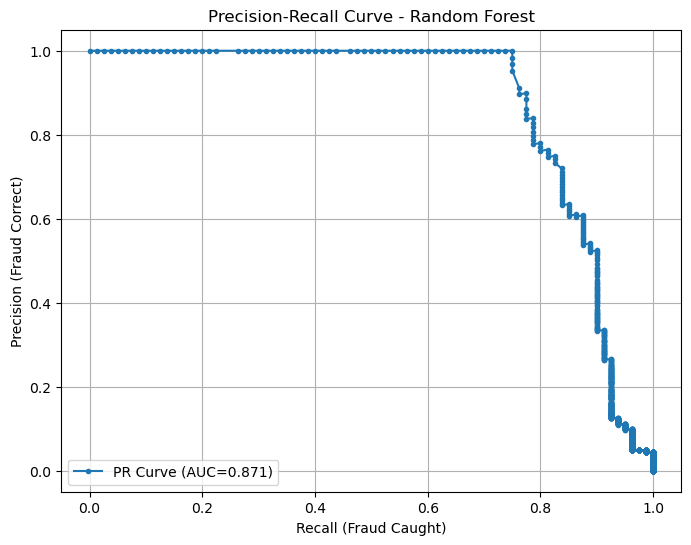

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_rf)

# Area under curve
pr_auc = auc(recalls, precisions)

plt.figure(figsize=(8,6))
plt.plot(recalls, precisions, marker='.', label=f'PR Curve (AUC={pr_auc:.3f})')
plt.xlabel('Recall (Fraud Caught)')
plt.ylabel('Precision (Fraud Correct)')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


# saving model 

In [51]:
import joblib

# Save the trained model
joblib.dump(rf, "fraud_detection_rf.pkl")

print("✅ Model saved as fraud_detection_rf.pkl")


✅ Model saved as fraud_detection_rf.pkl


In [28]:
# loading later 

# Step 9 – Inference Function

In [30]:
def predict_fraud(new_data, model, threshold=0.5):
    """
    new_data: dict or pandas Series or single-row DataFrame
    model: trained Random Forest model
    threshold: probability cutoff
    """
    # Convert Series → DataFrame
    if isinstance(new_data, pd.Series):
        new_data = new_data.to_frame().T
    
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])
    
    # Predict probability
    prob = model.predict_proba(new_data)[:, 1][0]
    
    # Classify
    label = 1 if prob >= threshold else 0
    
    return {"fraud_probability": round(prob, 4), "prediction": label}

# ✅ Example usage with DataFrame row
sample_txn = X_test.iloc[[0]]   # double brackets = DataFrame, not Series
result = predict_fraud(sample_txn, model, threshold=0.5)
print("Prediction Result:", result)


Prediction Result: {'fraud_probability': np.float64(0.1404), 'prediction': 0}


# Step 10 – Isolation Forest (Anomaly Detection)

In [33]:
iso = IsolationForest(
    n_estimators=100,
    contamination=0.01,   # instead of 0.001
    random_state=42,
    n_jobs=-1
)


In [34]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Train Isolation Forest only on normal training data
iso = IsolationForest(
    n_estimators=100,       # small, keeps it light
    contamination=0.001,    # expected fraud % in data
    random_state=42,
    n_jobs=-1
)

iso.fit(X_train_res)  # use balanced data

# Predict anomalies on test set
y_pred_iso = iso.predict(X_test)

# Convert: -1 = anomaly → fraud (1), 1 = normal → not fraud (0)
y_pred_iso = [1 if val == -1 else 0 for val in y_pred_iso]

# Evaluate against true fraud labels
print("Confusion Matrix (Isolation Forest):\n", confusion_matrix(y_test, y_pred_iso))
print("\nClassification Report (Isolation Forest):\n", classification_report(y_test, y_pred_iso, digits=4))


Confusion Matrix (Isolation Forest):
 [[59787   133]
 [   80     0]]

Classification Report (Isolation Forest):
               precision    recall  f1-score   support

           0     0.9987    0.9978    0.9982     59920
           1     0.0000    0.0000    0.0000        80

    accuracy                         0.9964     60000
   macro avg     0.4993    0.4989    0.4991     60000
weighted avg     0.9973    0.9964    0.9969     60000



# Surrogate Model (XAI with Decision Tree)

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Train surrogate tree to mimic Random Forest
surrogate = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate.fit(X_test, rf.predict(X_test))

# Print simple rules
rules = export_text(surrogate, feature_names=list(X_test.columns))
print("Surrogate Model Rules:\n")
print(rules)


Surrogate Model Rules:

|--- oldbalanceOrg <= 53093.00
|   |--- step <= 417.50
|   |   |--- oldbalanceOrg <= 1558.50
|   |   |   |--- class: 0
|   |   |--- oldbalanceOrg >  1558.50
|   |   |   |--- class: 0
|   |--- step >  417.50
|   |   |--- oldbalanceOrg <= 33708.09
|   |   |   |--- class: 0
|   |   |--- oldbalanceOrg >  33708.09
|   |   |   |--- class: 0
|--- oldbalanceOrg >  53093.00
|   |--- newbalanceOrig <= 54.49
|   |   |--- type <= 2.00
|   |   |   |--- class: 1
|   |   |--- type >  2.00
|   |   |   |--- class: 0
|   |--- newbalanceOrig >  54.49
|   |   |--- amount <= 6401198.12
|   |   |   |--- class: 0
|   |   |--- amount >  6401198.12
|   |   |   |--- class: 1



# AI Narrative (LLM-style Summary)

In [38]:
def batch_predict(dataframe, model, threshold=0.5):
    """
    dataframe: pandas DataFrame of transactions
    model: trained model
    threshold: probability cutoff
    """
    probs = model.predict_proba(dataframe)[:, 1]
    preds = (probs >= threshold).astype(int)
    results = dataframe.copy()
    results["fraud_probability"] = probs
    results["prediction"] = preds
    return results


In [45]:
def generate_ai_summary(df):
    # Always create bucket first
    df = df.copy()
    df['amount_bucket'] = pd.cut(df['amount'], 
                                 bins=[0, 500, 2000, 10000, float("inf")], 
                                 labels=["<500", "500-2000", "2000-10000", ">10000"])
    
    # Now filter fraud cases
    fraud_cases = df[df['prediction'] == 1]
    total_fraud = len(fraud_cases)
    total_txn = len(df)
    fraud_rate = (total_fraud / total_txn) * 100
    
    if total_fraud > 0:
        fraud_by_amount = fraud_cases['amount_bucket'].value_counts().idxmax()
    else:
        fraud_by_amount = "N/A"
    
    summary = (f"Fraudulent activity rate is {fraud_rate:.2f}% "
               f"({total_fraud} out of {total_txn} transactions). "
               f"Most frauds are in {fraud_by_amount} transactions, "
               f"with unusual balances or transaction types flagged.")
    return summary

# Example usage
batch_results = batch_predict(X_test.iloc[:5000], model, threshold=0.5)
print(generate_ai_summary(batch_results))


Fraudulent activity rate is 3.18% (159 out of 5000 transactions). Most frauds are in >10000 transactions, with unusual balances or transaction types flagged.


Fraud Rate: 2.61%


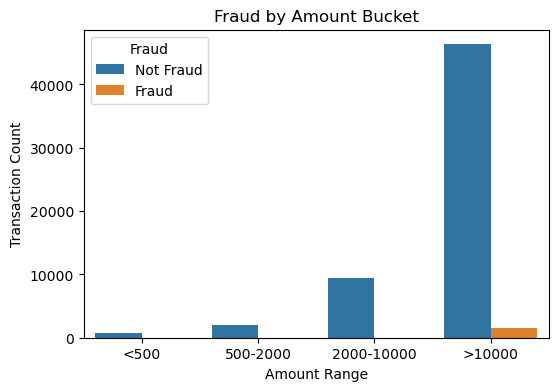

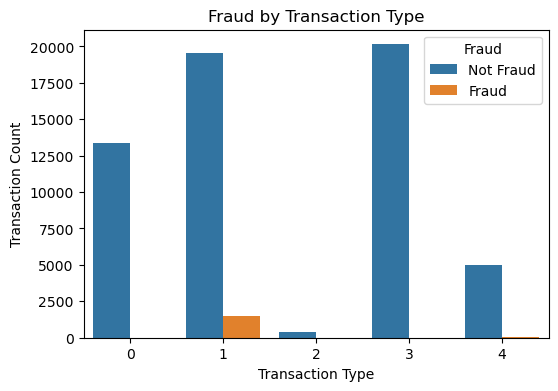

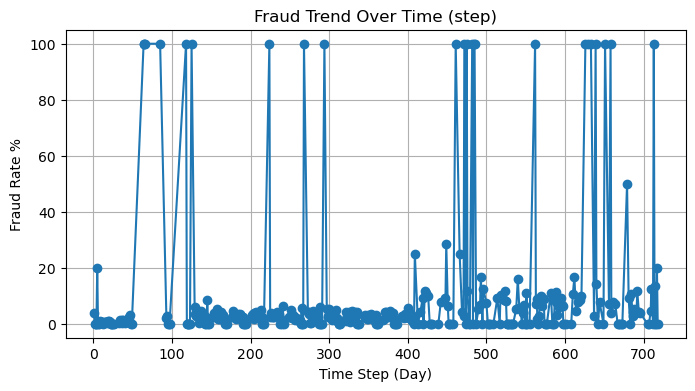


Top 10 Suspicious Transactions:

             amount  type  fraud_probability  prediction
6039802  2755588.11     4           0.999789           1
6265327  2739248.30     4           0.999775           1
6088385  1543975.74     4           0.999760           1
6171062  1565621.39     4           0.999759           1
6270344  1289142.33     4           0.999736           1
6272976   892213.56     4           0.999727           1
6358068  4130371.73     4           0.999702           1
6020276   830991.53     4           0.999693           1
6276616   711932.67     4           0.999639           1
6360919   751854.42     4           0.999565           1


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use full test predictions
batch_results = batch_predict(X_test, model, threshold=0.5)

# Fraud rate
fraud_rate = batch_results['prediction'].mean() * 100
print(f"Fraud Rate: {fraud_rate:.2f}%")

# 1. Fraud by Amount Bucket
batch_results['amount_bucket'] = pd.cut(batch_results['amount'], 
                                        bins=[0, 500, 2000, 10000, float("inf")],
                                        labels=["<500", "500-2000", "2000-10000", ">10000"])

plt.figure(figsize=(6,4))
sns.countplot(data=batch_results, x="amount_bucket", hue="prediction")
plt.title("Fraud by Amount Bucket")
plt.ylabel("Transaction Count")
plt.xlabel("Amount Range")
plt.legend(title="Fraud", labels=["Not Fraud", "Fraud"])
plt.show()

# 2. Fraud by Transaction Type
plt.figure(figsize=(6,4))
sns.countplot(data=batch_results, x="type", hue="prediction")
plt.title("Fraud by Transaction Type")
plt.ylabel("Transaction Count")
plt.xlabel("Transaction Type")
plt.legend(title="Fraud", labels=["Not Fraud", "Fraud"])
plt.show()

# 3. Fraud Trend Over Time
fraud_trend = batch_results.groupby("step")["prediction"].mean() * 100
plt.figure(figsize=(8,4))
fraud_trend.plot(marker="o")
plt.title("Fraud Trend Over Time (step)")
plt.ylabel("Fraud Rate %")
plt.xlabel("Time Step (Day)")
plt.grid(True)
plt.show()

# 4. Top Suspicious Transactions
top_suspicious = batch_results.sort_values("fraud_probability", ascending=False).head(10)
print("\nTop 10 Suspicious Transactions:\n")
print(top_suspicious[["amount", "type", "fraud_probability", "prediction"]])


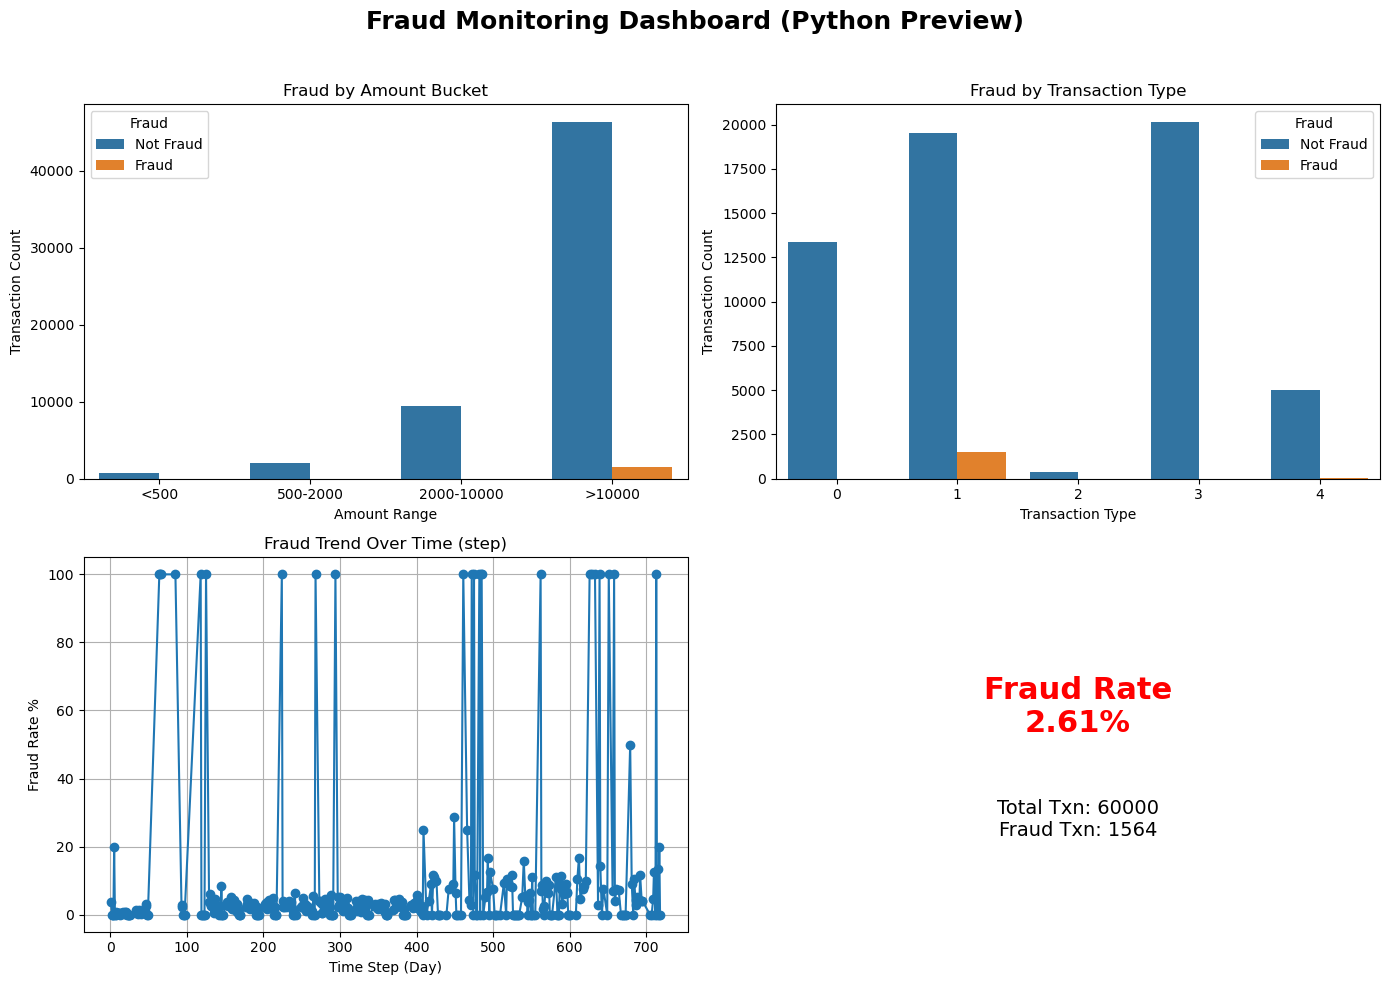


Top 10 Suspicious Transactions:

             amount  type  fraud_probability  prediction
6039802  2755588.11     4           0.999789           1
6265327  2739248.30     4           0.999775           1
6088385  1543975.74     4           0.999760           1
6171062  1565621.39     4           0.999759           1
6270344  1289142.33     4           0.999736           1
6272976   892213.56     4           0.999727           1
6358068  4130371.73     4           0.999702           1
6020276   830991.53     4           0.999693           1
6276616   711932.67     4           0.999639           1
6360919   751854.42     4           0.999565           1


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare results
batch_results = batch_predict(X_test, model, threshold=0.5)
batch_results['amount_bucket'] = pd.cut(batch_results['amount'], 
                                        bins=[0, 500, 2000, 10000, float("inf")],
                                        labels=["<500", "500-2000", "2000-10000", ">10000"])

fraud_rate = batch_results['prediction'].mean() * 100
fraud_trend = batch_results.groupby("step")["prediction"].mean() * 100

# Create dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1. Fraud by Amount Bucket
sns.countplot(data=batch_results, x="amount_bucket", hue="prediction", ax=axes[0,0])
axes[0,0].set_title("Fraud by Amount Bucket")
axes[0,0].set_xlabel("Amount Range")
axes[0,0].set_ylabel("Transaction Count")
axes[0,0].legend(title="Fraud", labels=["Not Fraud", "Fraud"])

# 2. Fraud by Transaction Type
sns.countplot(data=batch_results, x="type", hue="prediction", ax=axes[0,1])
axes[0,1].set_title("Fraud by Transaction Type")
axes[0,1].set_xlabel("Transaction Type")
axes[0,1].set_ylabel("Transaction Count")
axes[0,1].legend(title="Fraud", labels=["Not Fraud", "Fraud"])

# 3. Fraud Trend Over Time
fraud_trend.plot(marker="o", ax=axes[1,0])
axes[1,0].set_title("Fraud Trend Over Time (step)")
axes[1,0].set_xlabel("Time Step (Day)")
axes[1,0].set_ylabel("Fraud Rate %")
axes[1,0].grid(True)

# 4. KPI Card – Fraud Rate
axes[1,1].axis("off")  # Hide axis for text box
axes[1,1].text(0.5, 0.6, f"Fraud Rate\n{fraud_rate:.2f}%", 
               fontsize=22, ha="center", va="center", weight="bold", color="red")
axes[1,1].text(0.5, 0.3, f"Total Txn: {len(batch_results)}\nFraud Txn: {batch_results['prediction'].sum()}",
               fontsize=14, ha="center", va="center")

plt.suptitle("Fraud Monitoring Dashboard (Python Preview)", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print Top Suspicious Transactions
top_suspicious = batch_results.sort_values("fraud_probability", ascending=False).head(10)
print("\nTop 10 Suspicious Transactions:\n")
print(top_suspicious[["amount", "type", "fraud_probability", "prediction"]])


In [49]:
# ✅ Save as PNG
plt.savefig("fraud_dashboard.png", dpi=300)
plt.show()

print("✅ Dashboard saved as fraud_dashboard.png")

<Figure size 640x480 with 0 Axes>

✅ Dashboard saved as fraud_dashboard.png


In [56]:
def prepare_transaction(txn_dict, expected_features):
    """
    Takes a transaction dict with 'type' as string and returns
    a properly encoded DataFrame matching the model's expected features.
    """
    txn = txn_dict.copy()
    
    # One-hot encode type
    txn_type = txn.pop("type", None)   # remove type string
    type_columns = [c for c in expected_features if c.startswith("type_")]
    
    # Initialize all type_ columns as 0
    for col in type_columns:
        txn[col] = 0
    
    # Set the right type column = 1
    if txn_type is not None:
        col_name = f"type_{txn_type.upper()}"
        if col_name in type_columns:
            txn[col_name] = 1
    
    # Create DataFrame
    df = pd.DataFrame([txn])
    
    # Add missing columns
    for col in expected_features:
        if col not in df.columns:
            df[col] = 0
    
    # Reorder columns
    df = df[expected_features]
    return df

def check_transaction(new_txn, model, expected_features, threshold=0.5):
    df = prepare_transaction(new_txn, expected_features)
    prob = model.predict_proba(df)[:, 1][0]
    prediction = 1 if prob >= threshold else 0
    
    return {"fraud_probability": round(prob, 4),
            "prediction": "Fraud" if prediction == 1 else "Not Fraud"}


In [57]:
expected_features = list(X_train.columns)   # features from training

new_txn = {
    "step": 30,
    "type": "TRANSFER",   # raw string
    "amount": 12000,
    "oldbalanceOrg": 15000,
    "newbalanceOrig": 3000,
    "oldbalanceDest": 500,
    "newbalanceDest": 12500,
    "isFlaggedFraud": 0
}

print(check_transaction(new_txn, model, expected_features))


{'fraud_probability': np.float64(0.0788), 'prediction': 'Not Fraud'}
